In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
listing = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/listings.csv")
listing.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [3]:
listing.price.sample

<bound method NDFrame.sample of 0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object>

In [4]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
listing[["neighbourhood","neighbourhood_cleansed"]]

,neighbourhood,neighbourhood_cleansed
0,Queen Anne,West Queen Anne
1,Queen Anne,West Queen Anne
2,Queen Anne,West Queen Anne
3,Queen Anne,West Queen Anne
4,Queen Anne,West Queen Anne
...,...,...
3813,Fremont,Fremont
3814,Portage Bay,Portage Bay
3815,NaN,Rainier Beach
3816,NaN,Madison Park


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


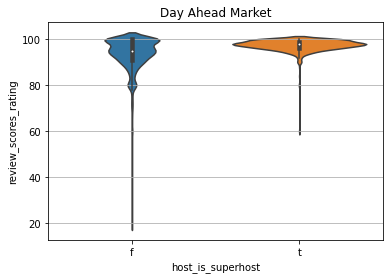

In [6]:
df = listing
fontsize = 10

fig, axes = plt.subplots()
sns.violinplot('host_is_superhost','review_scores_rating', data=df, ax = axes)
axes.set_title('Day Ahead Market')

axes.yaxis.grid(True)
axes.set_xlabel('host_is_superhost')
axes.set_ylabel('review_scores_rating')

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


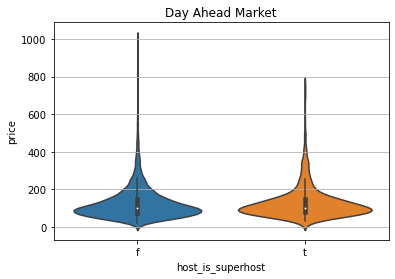

In [7]:
listing.price = listing.price.str.replace("$", "").str.replace(",", "").str.replace("%", "").astype('float64')
df = listing
fontsize = 10

fig1, axes1 = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('host_is_superhost','price', data=df, ax = axes1)
axes1.set_title('Day Ahead Market')

axes1.yaxis.grid(True)
axes1.set_xlabel('host_is_superhost')
axes1.set_ylabel('price')

plt.show()

<AxesSubplot:>

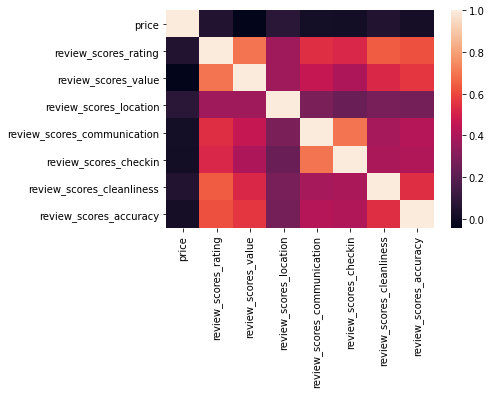

In [8]:
from scipy import stats
df2 = listing[['review_scores_rating','review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy']]
df3 = df2.dropna()

df4 = listing[['price','review_scores_rating','review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy']]


sns.heatmap(df4.corr())

<AxesSubplot:>

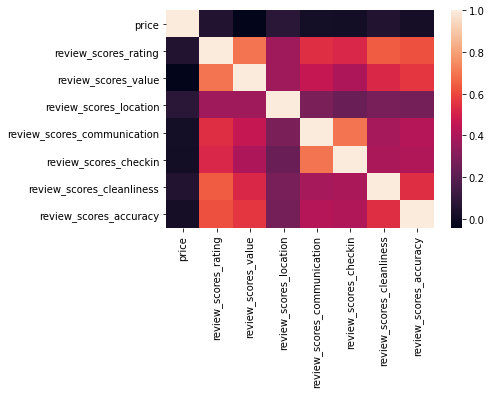

In [9]:
from scipy import stats
df2 = listing[['review_scores_rating','review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy']]
df3 = df2.dropna()

df4 = listing[['price','review_scores_rating','review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy']]


sns.heatmap(df4.corr())

In [10]:
import statsmodels.api as sm
y = df3['review_scores_rating']
x = df3[['review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy']]
est = sm.OLS(y,x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     review_scores_rating   R-squared (uncentered):                   0.998
Model:                              OLS   Adj. R-squared (uncentered):              0.998
Method:                   Least Squares   F-statistic:                          3.164e+05
Date:                  Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                          05:23:24   Log-Likelihood:                         -8745.2
No. Observations:                  3158   AIC:                                  1.750e+04
Df Residuals:                      3152   BIC:                                  1.754e+04
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
review_scores_value             2.9632      0.123     24.010      0.000       2.721       3.205
review_scores_location          0.5922      0.108      5.490      0.000       0.381       0.804
review_scores_communication     1.2337      0.174      7.104      0.000       0.893       1.574
review_scores_checkin           1.2437      0.162      7.700      0.000       0.927       1.560
review_scores_cleanliness       2.1545      0.110     19.584      0.000       1.939       2.370
review_scores_accuracy          1.6583      0.128     12.960      0.000       1.407       1.909
==============================================================================
Omnibus:                     1233.233   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15436.566
Skew:                          -1.497   Prob(JB):                         0.00
Kurtosis:                      13.409   Cond. No.                         75.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""